In [165]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# importing dataset file
dataset = pd.read_csv("Mall_Customers.csv")

# visualizing dataset
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [166]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [168]:
# replacing "Male" with 0
dataset=dataset.replace("Male",0)

# replacing "Female" with 1
dataset=dataset.replace("Female",1)


# droping unnecessary column
dataset=dataset.drop(columns=['CustomerID'])

print(dataset)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]


In [169]:
# print(dataset[3:])
# type(dataset)
data=np.array(dataset)

In [170]:
print(np.array(dataset["Spending Score (1-100)"]))

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


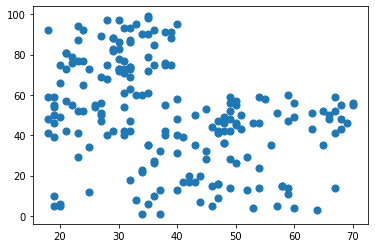

In [242]:
plt.scatter(np.array(dataset["Age"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.show()

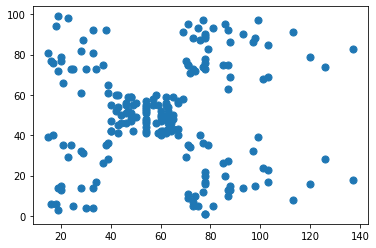

In [243]:
plt.scatter(np.array(dataset["Annual Income (k$)"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.show()

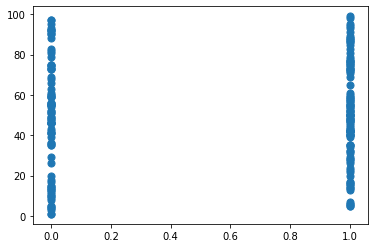

In [244]:
plt.scatter(np.array(dataset["Gender"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.show()

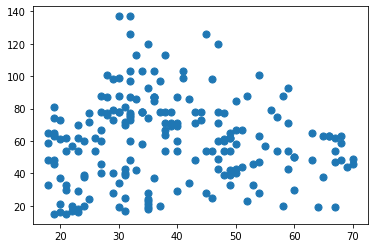

In [245]:
plt.scatter(np.array(dataset["Age"]),np.array(dataset["Annual Income (k$)"]),s=50)
plt.show()

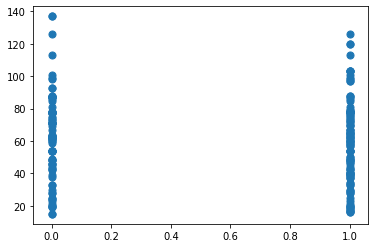

In [246]:
plt.scatter(np.array(dataset["Gender"]),np.array(dataset["Annual Income (k$)"]),s=50)
plt.show()

In [176]:
# import Kmean
from sklearn.cluster import KMeans

In [177]:
kmean=KMeans(n_clusters=2)

In [178]:
kmean.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [179]:
clusters= kmean.cluster_centers_
print(clusters)

[[ 0.55294118 28.95294118 62.17647059 73.62352941]
 [ 0.56521739 46.16521739 59.36521739 32.88695652]]


In [180]:
y_KM=kmean.fit_predict(dataset)
print(y_KM)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


## Determine the optimal clusters


# i) Elbow method

In [181]:
X=dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [197]:
elbow_list=[]

for k in range(1,13):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    
    elbow_list.append(kmeans.inertia_)
print(elbow_list)



[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30273.394312070042, 25029.25342493588, 21806.812998695455, 19636.753964898147, 17577.68782886206, 16287.953905789946]


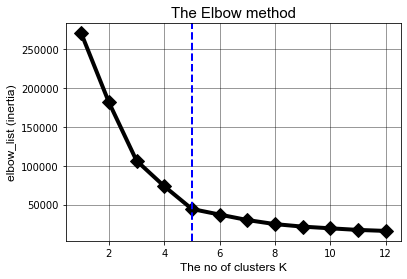

In [222]:
plt.plot(range(1,13),elbow_list,linewidth=4,color="black",marker="D",markersize=10)
plt.title("The Elbow method",family="Arial",fontsize="15",color="black")
plt.xlabel("The no of clusters K",family="Arial",fontsize="12",color="black")
plt.ylabel("elbow_list (inertia)",family="Arial",fontsize="12",color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.grid(which="both",color="black",axis="x",alpha=0.5)
plt.grid(which="both",color="black",axis="y",alpha=0.5)

# after visualising plot no of optimal cluster
no_of_optimal_clusters=5

plt.axvline(x=no_of_optimal_clusters,linewidth=2,color="blue",linestyle="--")
plt.show()

## ii) Silhouette method

In [226]:
from sklearn.metrics import silhouette_score

In [233]:
Silhouette_list=[]

for k in range(2,13):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    
    Silhouette_list.append(silhouette_score(X,kmeans.labels_))
print(Silhouette_list)


[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.5379675585622219, 0.4533280418148534, 0.4581763522413715, 0.4542082355911334, 0.4439241814982304, 0.45378874589521623, 0.4502472509631037]


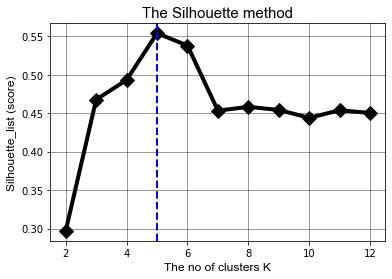

In [234]:
plt.plot(range(2,13),Silhouette_list,linewidth=4,color="black",marker="D",markersize=10)
plt.title("The Silhouette method",family="Arial",fontsize="15",color="black")
plt.xlabel("The no of clusters K",family="Arial",fontsize="12",color="black")
plt.ylabel("Silhouette_list (score)",family="Arial",fontsize="12",color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.grid(which="both",color="black",axis="x",alpha=0.5)
plt.grid(which="both",color="black",axis="y",alpha=0.5)

# after visualising plot no of optimal cluster
no_of_optimal_clusters=5

plt.axvline(x=no_of_optimal_clusters,linewidth=2,color="blue",linestyle="--")
plt.show()

In [247]:
kmeans=KMeans(n_clusters=no_of_optimal_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)